In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from classify_grid import *
import os, ebf
from astropy.io import ascii
import time
#import mwdust

In [2]:
# load MIST models
homedir=os.path.expanduser('~/')
model=ebf.read('/Users/petigura/code/isoclassify/mesa.ebf')

In [3]:
df = pd.DataFrame(model)

In [9]:
# stefan boltzman law
from astropy import constants as c
from astropy import units as u

%pylab
rstar = np.array(df.rad) * c.R_sun
teff = np.array(df.teff)* u.K
Lbol = 4 * pi * rstar**2 * c.sigma_sb * teff**4
L0 = 3.0128e28 * u.W
df['Mbol'] = np.log10(Lbol/L0) / (-0.4)
df['BCK'] = df.kmag - df.Mbol
df['BCV'] = df.vmag - df.Mbol
df['vmk'] = df.vmag - df.kmag
#cut = df.query('0.99 < mass < 1.01 and 4.4 < age < 4.6 and feh==0.0')
cut = df.query('5680 < teff < 5720 and 3 < age < 6')
cols = 'age mass rad teff logg feh BCK BCV vmk'.split()
cut[cols]

cut.BCK.hist()

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [79]:
teff0 = 5770
logg0 = 4.44
fe0 = 0.0

dteff = 60 
dlogg = 0.10
dfeh = 0.04
#df = df[df.age==4.5]

df['dist'] = np.sqrt( ((df.teff - teff0)/dteff)**2 +  ((df.logg - logg0)/dlogg)**2 + ((df.feh - fe0)/dfeh)**2)
ref = df.loc[df.dist.idxmin()]

df['dist'] = np.sqrt( ((df.teff - teff0+dteff)/dteff)**2 +  ((df.logg - logg0)/dlogg)**2 + ((df.feh - fe0)/dfeh)**2)
ref_teff = df.loc[df.dist.idxmin()]

df['dist'] = np.sqrt( ((df.teff - teff0)/dteff)**2 +  ((df.logg - logg0+ dlogg)/dlogg)**2 + ((df.feh - fe0)/dfeh)**2)
ref_logg = df.loc[df.dist.idxmin()]

df['dist'] = np.sqrt( ((df.teff - teff0)/dteff)**2 +  ((df.logg - logg0+ dlogg)/dlogg)**2 + ((df.feh - fe0+dfeh)/dfeh)**2)
ref_feh = df.loc[df.dist.idxmin()]

print ref[cols]
print ref_teff[cols]
print ref_logg[cols]
print ref_feh[cols]

age        3.500000
mass       0.986740
rad        0.964319
teff    5776.295472
logg       4.463829
feh        0.000000
BCK       -1.442127
BCV        0.047384
vmk        1.489511
Name: 2647322, dtype: float64
age        5.500000
mass       0.955752
rad        0.972033
teff    5710.537897
logg       4.443051
feh        0.000000
BCK       -1.476531
BCV        0.057066
vmk        1.533596
Name: 2656801, dtype: float64
age        8.500000
mass       0.957483
rad        1.103799
teff    5769.606278
logg       4.333418
feh        0.000000
BCK       -1.442857
BCV        0.051691
vmk        1.494548
Name: 2670936, dtype: float64
age        9.000000
mass       0.934805
rad        1.081726
teff    5771.607077
logg       4.340554
feh       -0.050000
BCK       -1.439567
BCV        0.057178
vmk        1.496745
Name: 2607310, dtype: float64


changing temperature by 60~K -> changed v-k by -0.04 mag, which corresponds to a change in the bolometric correction of 0.04 mag, which is consistent with what I see. 



In [81]:
0.9907*0.04 - 0.0395*0.04


0.038048000000000005

In [3]:
# parelims to manipulate some model variables (to be automated soon ...)
model['rho']=np.log10(model['rho'])
# next line turns off Dnu scaling relation corrections
model['fdnu'][:]=1.
model['avs']=np.zeros(len(model['teff']))
model['dis']=np.zeros(len(model['teff']))

In [5]:
# next 2 lines allow to use a reddening model (needs galactic coordinates)
#x.addcoords(338.3683920,-9.0227690)
#dustmodel = mwdust.Combined15()

In [6]:
# initilize class with observables


In [67]:
x=obsdata()
# add any combiantion of observables
# Teff, logg, FeH + uncertainties
x.addspec([5777.,4.44,0.0],[60.,0.07,0.04])
# numax & Dnu + uncertainties
#x.addseismo([1240.,63.5],[70.,1.5])
# 2MASS photometry 
x.addjhk([-99,-99,-99],[0,0,0.02])
x.addplx(1,0.001)
# Sloan photometry
#x.addgriz([11.776,11.354,11.238,11.178],[0.02,0.02,0.02,0.02])
paras=classify(input=x,model=model,dustmodel=0)

UnboundLocalError: local variable 'mape' referenced before assignment

teff 137309
feh 37334
number of models used within non-phot obsconstraints: 37334
number of models incl reddening: 4853420
number of models after phot constraints: 4853420
----


teff 5773.15397954 57.9414175526 60.7655321549
logg 4.43233273135 0.0573393121968 0.0811500598853
feh -0.0295064169983 0.100603604078 0.100112948524
rad 0.990559319148 0.0915027544364 0.0660243539058
mass 0.977014864234 0.0515099192241 0.0509290287432
rho 0.987785628329 0.215867727654 0.234825647849
lum 0.982560769776 0.202302698879 0.142822861346
age 4.6768057998 3.24853118625 2.97313404774
avs 0.3425 0.442 0.442
dis 213.37424297 20.3505213397 15.3697917112


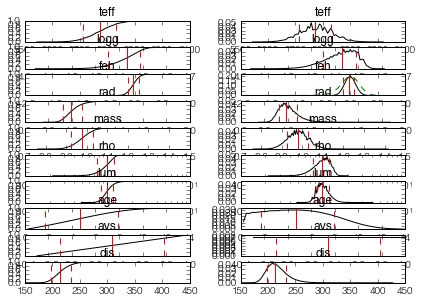

In [16]:
paras=classify(input=x,model=model,dustmodel=0.)

In [64]:
# add any combiantion of observables
# Teff, logg, FeH + uncertainties
#x.addspec([5109.23,3.49595,0.0380301],[60.,0.10,0.04])
x.addspec([5109.23,3.49595,0.0380301],[60.,0.1,0.04])
# numax & Dnu + uncertainties
#x.addseismo([1240.,63.5],[70.,1.5])
# 2MASS photometry 
x.addjhk([-99,-99,10.0],[0,0,0.02])
# Sloan photometry
#x.addgriz([11.776,11.354,11.238,11.178],[0.02,0.02,0.02,0.02])
x.addplx(1./1372.,1./372.*0.03)
# run classification
%pylab inline

paras=classify(input=x,model=model,dustmodel=0.)
gcf().set_tight_layout(True)

Populating the interactive namespace from numpy and matplotlib
teff 273827
feh 5281
number of models used within non-phot obsconstraints: 5281
number of models incl reddening: 686530
number of models after phot constraints: 0
----


In [62]:
paras.

<classify_grid.resdata instance at 0x1816527ef0>

In [17]:
from scipy.interpolate import interp1d

In [18]:
interp1d?

1.86656246015e-15 0.05 0.05


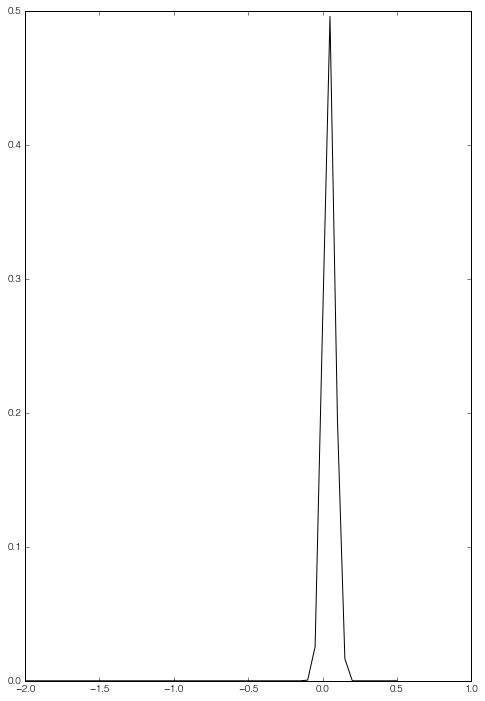

In [9]:
# print mass median +/- 1 sigma, plot posterior
print paras.feh,paras.fehep,paras.fehem
plt.plot(paras.fehpx,paras.fehpy)

In [ ]:
# plot teff posterior
plt.plot(paras.teffpx,paras.teffpy)

In [ ]:
# print age median +/- 1 sigma, plot posterior
print paras.age,paras.ageep,paras.ageem
plt.plot(paras.agepx,paras.agepy)

In [ ]:
# print mass median +/- 1 sigma, plot posterior
print paras.mass,paras.massep,paras.massem
plt.plot(paras.masspx,paras.masspy)

In [ ]:
# print mass median +/- 1 sigma, plot posterior
print paras.feh,paras.fehep,paras.fehem
plt.plot(paras.fehpx,paras.fehpy)

In [ ]:
# delete numax & Dnu constraint
x.addseismo([-99.,-99.],[70.,1.5])
# add parallax with a 3% uncertainty
x.addplx(1./372.,1./372.*0.03)

In [ ]:
# re-run classification
paras=classify(input=x,model=model,dustmodel=0.,doplot=0)

In [ ]:
# print age median +/- 1 sigma, plot posterior
print paras.age,paras.ageep,paras.ageem
plt.plot(paras.agepx,paras.agepy)

In [73]:
10 / np.log(10) * 60 / 5700

0.045715208621394929